# Study Resonance Driving Terms (RDTs)

### Imports

In [1]:
from cpymad.madx import Madx
from pyoptics import optics
import matplotlib.pyplot as plt
import numpy as np
import inspect


# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns


# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

### Study Run III optics

In [2]:
def load_optics(path_optics, path_hl = None, path_settings = None):

    # Get run
    run = path_optics.split('/')[1]

    # Build sequence
    mad = Madx()

    # Prepare for building sequence
    mad.input("""
    option,-echo,-info;
    system,"mkdir temp";
    """)

    # Build sequence
    mad.input(f"""
    call,file="modules/{run}/lhc.seq";
    """)

    # Apply HL optics if requested
    if path_hl is not None:
        mad.input(f"""
        call,file="{path_hl}";
        """)

    # Apply macro
    mad.input(f"""
    -call,file="modules/{run}/toolkit/macro.madx";
    """)

    # Give a beam with correct energy
    mad.input(f"""
        nrj=450;
        beam,particle=proton,sequence=lhcb1,energy=nrj;
        beam,particle=proton,sequence=lhcb2,energy=nrj;
    """)



    # Injection optics (beta* = 11mm)
    mad.input(f"""
    call,file="{path_optics}";
    """)

    # Phase knob
    if path_settings is not None:
        mad.input(f"""
        call,file="{path_settings}";
        """)
    
    return mad


In [3]:
# Add twiss_opt and check_ip functions

def macros(mad):
  mad.input("""
  twiss_opt: macro = {
  set,format=".15g";
  select,flag=twiss,clear;
  select,flag=twiss,
        column=name,s,l,
                lrad,angle,k1l,k2l,k3l,k1sl,k2sl,k3sl,hkick,vkick,kick,tilt,
                betx,bety,alfx,alfy,dx,dpx,dy,dpy,mux,muy,x,y,px,py,t,pt,
                wx,wy,phix,phiy,n1,ddx,ddy,ddpx,ddpy,
                keyword,aper_1,aper_2,aper_3,aper_4,
                apoff_1,apoff_2,
                aptol_1,aptol_2,aptol_3,apertype,mech_sep;
  select,flag=aperture,
        column=name,s,n1,aper_1,aper_2,aper_3,aper_4,rtol,xtol,ytol,
                apoff_1,apoff_2,
                betx,bety,dx,dy,x,y,apertype;
  };
  """)


  mad.input("""
  CHECK_IP(BIM): macro = {
  exec,twiss_opt;
  use,sequence=lhcBIM;
  if (mylhcbeam<3) {
    twiss,file=twiss_lhcBIM.tfs;
  } else {
    twiss,file=twiss_lhcb4.tfs;
  };
  refbetxIP1BIM=table(twiss,IP1,betx); refbetyIP1BIM=table(twiss,IP1,bety);
  refbetxIP5BIM=table(twiss,IP5,betx); refbetyIP5BIM=table(twiss,IP5,bety);
  refbetxIP2BIM=table(twiss,IP2,betx); refbetyIP2BIM=table(twiss,IP2,bety);
  refbetxIP8BIM=table(twiss,IP8,betx); refbetyIP8BIM=table(twiss,IP8,bety);
  refqxBIM=table(summ,q1); refqyBIM=table(summ,q2);
  refdqxBIM=table(summ,dq1); refdqyBIM=table(summ,dq2);
  refxIP1BIM=table(twiss,IP1,x); refyIP1BIM=table(twiss,IP1,y);
  refxIP5BIM=table(twiss,IP5,x); refyIP5BIM=table(twiss,IP5,y);
  refxIP2BIM=table(twiss,IP2,x); refyIP2BIM=table(twiss,IP2,y);
  refxIP8BIM=table(twiss,IP8,x); refyIP8BIM=table(twiss,IP8,y);
  refpxIP1BIM=table(twiss,IP1,px); refpyIP1BIM=table(twiss,IP1,py);
  refpxIP5BIM=table(twiss,IP5,px); refpyIP5BIM=table(twiss,IP5,py);
  refpxIP2BIM=table(twiss,IP2,px); refpyIP2BIM=table(twiss,IP2,py);
  refpxIP8BIM=table(twiss,IP8,px); refpyIP8BIM=table(twiss,IP8,py);
  refxIP3BIM=table(twiss,IP3,x); refyIP3BIM=table(twiss,IP3,y);
  refxIP4BIM=table(twiss,IP4,x); refyIP4BIM=table(twiss,IP4,y);
  refxIP6BIM=table(twiss,IP6,x); refyIP6BIM=table(twiss,IP6,y);
  refxIP7BIM=table(twiss,IP7,x); refyIP7BIM=table(twiss,IP7,y);
  refpxIP3BIM=table(twiss,IP3,px); refpyIP3BIM=table(twiss,IP3,py);
  refpxIP4BIM=table(twiss,IP4,px); refpyIP4BIM=table(twiss,IP4,py);
  refpxIP6BIM=table(twiss,IP6,px); refpyIP6BIM=table(twiss,IP6,py);
  refpxIP7BIM=table(twiss,IP7,px); refpyIP7BIM=table(twiss,IP7,py);
  value,refbetxIP1BIM,refbetyIP1BIM;
  value,refbetxIP5BIM,refbetyIP5BIM;
  value,refbetxIP2BIM,refbetyIP2BIM;
  value,refbetxIP8BIM,refbetyIP8BIM;
  value,refqxBIM,refqyBIM;
  value,refdqxBIM,refdqyBIM;
  value,refxIP1BIM,refyIP1BIM;
  value,refxIP5BIM,refyIP5BIM;
  value,refxIP2BIM,refyIP2BIM;
  value,refxIP8BIM,refyIP8BIM;
  value,refpxIP1BIM,refpyIP1BIM;
  value,refpxIP5BIM,refpyIP5BIM;
  value,refpxIP2BIM,refpyIP2BIM;
  value,refpxIP8BIM,refpyIP8BIM;
  };
  """)
  
  return mad

In [9]:
# Check that everything is ok at IPs and output twiss files
def check_and_load_twiss(mad):
    
    mad.input("""
    exec,check_ip(b1);
    exec,check_ip(b2);
    """
    )

    # Load Twiss
    t=optics.open('twiss_lhcb1.tfs')
    
    # Impose strength for octupoles
    t.k3l[t//'mo.*']=0.1
    return mad, t

In [21]:
# Function to compute RDTs
def compute_RDT(t, RDT = (0,4)):
    return abs(np.cumsum(t.drvterm(*RDT)*t.k3l))

# Get all RDTs
def get_all_RDTs(t):
    return t.s, {RDT : compute_RDT(t, RDT) for RDT in [(0,4), (4,0), (1,3), (3,1), (2,2)]}

# Plot RDTs
def plot_RDT(s, dic_RDTs, title = None, title_save = "RDT.pdf"):
    for type_RDT, RDT in dic_RDTs.items():
        plt.plot(s,RDT, label = str(type_RDT))
    plt.xlabel('s [m]')
    plt.ylabel('RDTs (a.u.)')
    plt.legend()
    plt.grid()
    if title is not None:
        plt.title(title)
    plt.savefig(title_save, bbox_inches='tight')
    plt.show()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2023.12.04 11:31:48      +
  ++++++++++++++++++++++++++++++++++++++++++++


mkdir: cannot create directory ‘temp’: File exists


++++++ warning: implicit element re-definition ignored: ip1
++++++ warning: implicit element re-definition ignored: mbas2.1r1
++++++ warning: implicit element re-definition ignored: tas.1r1
++++++ warning: implicit element re-definition ignored: mqxa.1r1
++++++ warning: implicit element re-definition ignored: mcbxh.1r1
++++++ warning: implicit element re-definition ignored: mcbxv.1r1
++++++ warning: implicit element re-definition ignored: mqxb.a2r1
++++++ warning: implicit element re-definition ignored: mcbxh.2r1
++++++ warning: implicit element re-definition ignored: mcbxv.2r1
++++++ warning: implicit element re-definition ignored: mqxb.b2r1
++++++ warning: implicit element re-definition ignored: tasb.3r1
++++++ warning: implicit element re-definition ignored: mqsx.3r1
++++++ warning: implicit element re-definition ignored: mqxa.3r1
++++++ warning: implicit element re-definition ignored: mcbxh.3r1
++++++ warning: implicit element re-definition ignored: mcbxv.3r1
++++++ warning: implic

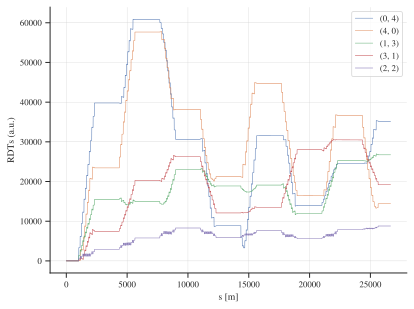

enter Twiss module
  
iteration:   1 error:   2.776299E-03 deltap:   0.000000E+00
orbit:  -1.987647E-03 -7.924653E-06  3.352869E-05 -1.705009E-04  0.000000E+00  0.000000E+00
  
iteration:   2 error:   9.793918E-05 deltap:   0.000000E+00
orbit:  -2.000047E-03 -4.989014E-09 -4.553741E-09 -1.699952E-04  0.000000E+00  0.000000E+00
  
iteration:   3 error:   5.389333E-08 deltap:   0.000000E+00
orbit:  -1.999999E-03  2.569142E-11 -3.400264E-12 -1.700000E-04  0.000000E+00  0.000000E+00

++++++ table: summ

length orbit5 alfa gammatr 
26658.8831999989 -0 0.000347985143980626 53.606770982878 

q1 dq1 betxmax dxmax 
62.309999903699 9.97379554506739 588.948167523327 2.76906293177313 

dxrms xcomax xcorms q2 
1.49670253200205 0.00849150235090286 0.000787609686360079 60.3200000322511 

dq2 betymax dymax dyrms 
9.99265639792865 640.919871876276 0.149395212768029 0.0380208748683305 

ycomax ycorms deltap synch_1 
0.0084999238573682 0.000773573236571676 0 0 

synch_2 synch_3 synch_4 synch_5 
0 0 0 0 


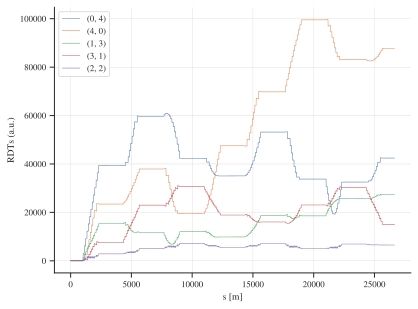

In [22]:
# Load paths
path_optics_with_knob= "modules/runIII2023/operation/optics/R2023a_A11mC11mA10mL10m_PhaseKnob100ON.madx"
path_settings = "modules/runIII2023/scenarios/pp_lumi/RAMP-SQUEEZE-6.8TeV-ATS-2m-2023_V1/0/settings.madx"

# Plot RDTs with and without phase knob
mad = load_optics(path_optics_with_knob, path_hl = None, path_settings = path_settings)
mad = macros(mad)
mad, t = check_and_load_twiss(mad)
s_with_knob, dic_RDTs_with_knob = get_all_RDTs(t)
plot_RDT(s_with_knob, dic_RDTs_with_knob, title_save = "RDT_with_knob.pdf")

# Remove phase knob
mad.input("phase_change.b1=0.0;")
mad.input("phase_change.b2=0.0;")

# Replot
mad, t = check_and_load_twiss(mad)
s_without_knob, dic_RDTs_without_knob = get_all_RDTs(t)

plot_RDT(s_without_knob, dic_RDTs_without_knob, title_save = "RDT_without_knob.pdf")



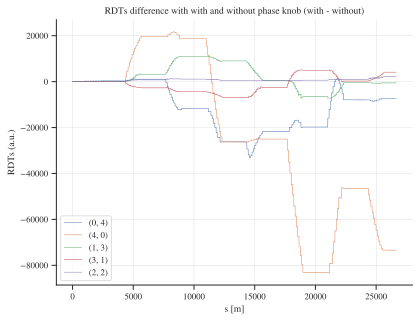

In [23]:
# Plot difference between RDTs
dic_diff_RDT = {type_RDT : dic_RDTs_with_knob[type_RDT] - dic_RDTs_without_knob[type_RDT] for type_RDT in dic_RDTs_with_knob}
plot_RDT(s_without_knob, dic_diff_RDT, title = 'RDTs difference with with and without phase knob (with - without)', title_save = "diff_RDTs.pdf")


### Load HL-LHC optics

In [ ]:
# Build sequence
mad = Madx()

# Prepare for building sequence
mad.input("""
option,-echo,-info;
system,"mkdir temp";
""")

# Build sequence
mad.input("""
call,file="modules/hllhc16/lhc.seq";
call,file="modules/hllhc16/hllhc_sequence.madx";
call,file="modules/hllhc16/toolkit/macro.madx";
""")

# Give a beam with correct energy
mad.input("""
exec,mk_beam(450);
""")


# Injection optics (beta* = 6m)
mad.input("""
call,file="modules/hllhc16/strengths/ramp/opt_ramp_6000.madx";
""")



: 

In [ ]:
# Rematch optics
mad.input("""
call,file="modules/hllhc16/toolkit/rematch_hllhc.madx";      
""")

# Check that everything is ok at IPs and output twiss files
mad.input("""
exec,check_ip(b1);
exec,check_ip(b2);
"""
)

: 

In [ ]:
# Save optics
mad.input("""
exec,save_optics_hllhc(opt_inj_6000.madx);
""")

: 

In [ ]:
# Reload optics from madx
mad.input("""
call,file="opt_inj_6000.madx";
""")
mad.input("""
exec,check_ip(b1);
exec,check_ip(b2);
"""
)


: 

In [ ]:
# Load Twiss
t=optics.open('twiss_lhcb1.tfs')

: 

In [ ]:
# t contains all elements, including their strengths
# Using regex (on t.name under the hood), one can select the k3 strength 
# (which normally only applies to octupoles, but which is available for all elements)
# And assign a given value to it
# All other strengths are still at zero by default
t.k3l[t//'mo.*']=0.1

: 

In [ ]:
# Print the source code of the function
print(inspect.getsource(t.drvterm))

: 

In [ ]:
# Plot RDTs
for RDT in [(0,4), (4,0), (1,3), (3,1), (2,2)]:
    plt.plot(t.s,abs(np.cumsum(t.drvterm(*RDT)*t.k3l)), label = str(RDT))
#plt.plot(t.s,abs(np.cumsum(t.drvterm(4,0)*t.k3l)), label = str(RDT))
#plt.plot(t.s,abs(np.cumsum(t.drvterm(0,-4)*t.k3l)), label = str(RDT))
plt.xlabel('s [m]')
plt.ylabel('RDTs (a.u.)')
plt.legend()
plt.grid()
plt.show()

: 

In [ ]:
# Load HLLHC optics

: 